# CS 4661 Homework 3

#### Vidushi Dikshit(CIN: 305064011 )

#### Chittaksh Khadse(CIN: 305058538 )

### Que 1 - In this question, we work with a simplified version of Heart dataset (remember that this dataset is a little different from what you have used in HW2). Read the dataset file “Hearts_short.csv” (you should download it from CSNS), and assign it to a Pandas DataFrame.

In [17]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/vidushidikshit/Machine_Learning/master/Heart_short.csv")
heart_df.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


### Que 2 - Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [19]:
def categorical_to_numeric(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
   
    
heart_df['label'] = heart_df['AHD'].apply(categorical_to_numeric)
y= heart_df['label']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [20]:
feature_cols = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak']
#heart_dataf[feature_cols]

#Normalization of the data.
for f  in feature_cols:
    max_feature = heart_df[f].max()
    heart_df[f]= heart_df[f]/max_feature
    #print(max_feature)
#heart_dataf

X= heart_df[feature_cols]
X.head()

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,0.818182,0.725,0.413121,1.0,0.742574,0.370968
1,0.870130,0.800,0.507092,1.0,0.534653,0.241935
2,0.870130,0.600,0.406028,1.0,0.638614,0.419355
3,0.480519,0.650,0.443262,0.0,0.925743,0.564516
4,0.532468,0.650,0.361702,1.0,0.851485,0.225806


### Que 3 - Split the dataset into testing and training sets with the following parameters: test_size=0.2, random_state=3.

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [22]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(224, 6)
(224,)
(57, 6)
(57,)


### Que 4 - Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [23]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression()

In [24]:
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

[0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]


In [26]:
score_lr = accuracy_score(y_test, y_predict_lr)

print(score_lr)

0.719298245614


### Que 5 - Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [27]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print(tpr)

[ 0.          0.03333333  0.03333333  0.06666667  0.06666667  0.1         0.1
  0.13333333  0.13333333  0.16666667  0.16666667  0.2         0.2
  0.26666667  0.26666667  0.4         0.4         0.43333333  0.43333333
  0.63333333  0.63333333  0.7         0.7         0.83333333  0.83333333
  0.9         0.9         1.        ]
[ 0.03703704  0.03703704  0.25925926  0.25925926  0.40740741  0.40740741
  0.44444444  0.44444444  0.55555556  0.55555556  0.59259259  0.59259259
  0.66666667  0.66666667  0.7037037   0.7037037   0.74074074  0.74074074
  0.81481481  0.81481481  0.85185185  0.85185185  0.88888889  0.88888889
  0.92592593  0.92592593  1.          1.        ]


In [29]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.73950617284


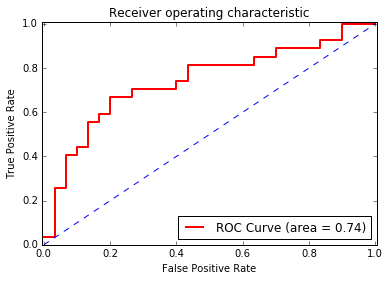

In [30]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()